In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import io

# Check and change column names

In [26]:
#get the socioeconmic data
url = ("https://raw.githubusercontent.com/cs-ssa-w21/final-project-rooibos/master/socioeco_variables_pre.csv")
s=requests.get(url).content
df3=pd.read_csv(io.StringIO(s.decode('utf-8')))

In [27]:
#formatting
df3.rename(columns={'city':'City'}, inplace=True)
df3 = df3.drop(df3.columns[0], axis = 1)

# Merge datasets
Merge socioeconmic datasets with the dataset of gender-specific crimes

In [28]:
#Get the data of sex-specific crimes
url = ("https://raw.githubusercontent.com/cs-ssa-w21/final-project-rooibos/master/data.csv")
s=requests.get(url).content
df4=pd.read_csv(io.StringIO(s.decode('utf-8')))

In [29]:
#formatting
df4.rename(columns={'location_CN':'City'}, inplace=True)

In [30]:
#We use "left merge" method to keep all the cities in the "crime" set
total_data = pd.merge(df4, df3, how = "left", on = "City")

In [31]:
total_data.head(10)

,number of cases,City,location_ENG,"Population at Year-end (10,000 persons)",Natural growth rate (‰),"Number of employees at the end of the year (10,000 Persons)","Number of the registered unemployed at the end of year (10,000 Persons)",Average annual salary per urban employee (Yuan),"Number of average employees on site (10,000 persons)",Population density (person / square kilometer),...,"Government expenditure on Science (10,000 yuan)","Government expenditure on Education (10,000 yuan)",Number of secondary schools,Number of theaters,Number of collections of public library (/100 people),Number of persons joining urban basic medical care system,Persons covered of unemployment insurance,"Population (registered residence population) at the end of the year (10,000)","Number of male population (registered residence population) at the end of the year (10,000)","Number of female population (registered residence population) at the end of the year (10,000)"
0,1,七台河市,"('Qitaihe', 'Heilongjiang')",81.6620,-2.048000,10.08930,8840.8,48290.960,9.762,137.615,...,1811.60,83776.8,45.00,3.0,27.700,208099.2,99408.00,81.5220,41.584,39.97178
1,1,三明市,"('Sanming', 'Fujian')",286.4240,13.562000,24.40308,10091.2,65480.386,21.344,123.670,...,41773.80,520682.8,156.40,20.0,169.860,472247.0,293083.40,286.4320,149.690,136.57000
2,1,三门峡市,"('Sanmenxia', 'Henan')",228.0140,5.302000,25.10564,8138.0,51438.968,23.870,217.130,...,26938.00,384796.8,126.20,6.0,61.490,376058.8,232630.40,228.2675,NaN,NaN
3,1,东营市,"('Dongying', 'Shandong')",192.9440,9.894000,42.44210,11774.8,73561.942,40.810,230.550,...,44213.80,503319.6,95.60,20.0,113.150,950668.0,283676.80,192.8800,96.264,96.58000
4,1,临汾市,"('Linfen', 'Shanxi')",431.9180,6.398000,36.82062,18463.8,51662.988,33.976,212.080,...,12284.20,502196.2,279.80,27.0,35.520,669201.0,350051.80,431.6475,NaN,NaN
5,1,乌兰察布市,"('Ulanqab', 'Inner Mongolia')",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,伊春市,"('Yichun', 'Heilongjiang')",118.2380,-5.254000,17.17012,21249.8,36261.094,15.582,37.040,...,3066.40,80321.8,50.40,8.0,70.405,387509.8,125358.80,118.2440,58.820,59.52414
7,1,儋州市,"('Danzhou', 'Hainan')",96.0375,13.213333,32.00715,1845.0,68096.750,3.660,282.850,...,1565.25,157870.0,49.25,NaN,12.480,122267.0,51500.75,NaN,NaN,NaN
8,1,六盘水市,"('Liupanshui', 'Guizhou')",338.5400,13.012000,23.95390,16753.0,67427.276,20.362,333.540,...,43747.20,580974.8,220.40,7.0,13.845,382331.6,160042.20,338.3615,178.240,160.10200
9,1,内江市,"('Neijiang', 'Sichuan')",418.6860,0.800000,29.23844,17763.6,47901.146,29.416,785.405,...,14138.80,382991.8,179.00,9.0,13.320,497156.8,130850.20,418.6660,215.420,203.22000


# Imputation based on province

If one city is missing, we impute its data with the mean of the data of other cities in the same province.

In [32]:
#The number of row
len_row = total_data.shape[0]
#The number of column
len_column = total_data.shape[1]

In [33]:
#create columns of cities and provinces
total_data['Province'] = pd.Series("", index=total_data.index)
total_data['City_E'] = pd.Series("", index=total_data.index)
for i in range(len_row):
    province_city = total_data.iloc[i,2]
    province = province_city.split(',')[1].strip(",') ")
    city = province_city.split(',')[0].strip(",'( ")
    total_data.iloc[i,len_column + 1] = city
    total_data.iloc[i,len_column] = province

In [35]:
#impute the data with mean of cities in the same province
for i in range(len_row):    
    if np.count_nonzero(total_data.iloc[i].isnull().values) > 0:
        columns_name = total_data.columns[3:-2]
        total_data.loc[i,columns_name] = total_data.loc[total_data['Province'] == total_data.loc[i,'Province']].mean()

In [36]:
total_data.head(10)

,number of cases,City,location_ENG,"Population at Year-end (10,000 persons)",Natural growth rate (‰),"Number of employees at the end of the year (10,000 Persons)","Number of the registered unemployed at the end of year (10,000 Persons)",Average annual salary per urban employee (Yuan),"Number of average employees on site (10,000 persons)",Population density (person / square kilometer),...,Number of secondary schools,Number of theaters,Number of collections of public library (/100 people),Number of persons joining urban basic medical care system,Persons covered of unemployment insurance,"Population (registered residence population) at the end of the year (10,000)","Number of male population (registered residence population) at the end of the year (10,000)","Number of female population (registered residence population) at the end of the year (10,000)",Province,City_E
0,1,七台河市,"('Qitaihe', 'Heilongjiang')",81.662000,-2.048000,10.089300,8840.800000,48290.960000,9.762000,137.615000,...,45.000000,3.000000,27.700000,208099.200000,99408.000000,81.522000,41.584000,39.971780,Heilongjiang,Qitaihe
1,1,三明市,"('Sanming', 'Fujian')",286.424000,13.562000,24.403080,10091.200000,65480.386000,21.344000,123.670000,...,156.400000,20.000000,169.860000,472247.000000,293083.400000,286.432000,149.690000,136.570000,Fujian,Sanming
2,1,三门峡市,"('Sanmenxia', 'Henan')",718.879600,7.924267,67.714143,28008.213333,49751.920933,61.795200,760.757000,...,340.506667,10.266667,25.260333,796378.386667,487342.866667,716.382833,NaN,NaN,Henan,Sanmenxia
3,1,东营市,"('Dongying', 'Shandong')",192.944000,9.894000,42.442100,11774.800000,73561.942000,40.810000,230.550000,...,95.600000,20.000000,113.150000,950668.000000,283676.800000,192.880000,96.264000,96.580000,Shandong,Dongying
4,1,临汾市,"('Linfen', 'Shanxi')",343.269778,5.015778,43.037547,20061.757407,56835.102222,40.360222,261.541667,...,222.777778,13.888889,49.134444,715180.274074,399020.777778,343.198333,NaN,NaN,Shanxi,Linfen
5,1,乌兰察布市,"('Ulanqab', 'Inner Mongolia')",262.801714,3.688571,31.986631,28642.000000,61967.695714,31.212000,53.709286,...,106.142857,14.142857,72.278571,606709.714286,279168.514286,262.895000,145.182474,135.336669,Inner Mongolia,Ulanqab
6,1,伊春市,"('Yichun', 'Heilongjiang')",118.238000,-5.254000,17.170120,21249.800000,36261.094000,15.582000,37.040000,...,50.400000,8.000000,70.405000,387509.800000,125358.800000,118.244000,58.820000,59.524140,Heilongjiang,Yichun
7,1,儋州市,"('Danzhou', 'Hainan')",108.044500,11.723111,32.035857,4973.733333,65996.602667,21.779333,435.451667,...,66.950000,6.000000,57.500000,291752.600000,239962.183333,114.082890,58.424940,55.680950,Hainan,Danzhou
8,1,六盘水市,"('Liupanshui', 'Guizhou')",338.540000,13.012000,23.953900,16753.000000,67427.276000,20.362000,333.540000,...,220.400000,7.000000,13.845000,382331.600000,160042.200000,338.361500,178.240000,160.102000,Guizhou,Liupanshui
9,1,内江市,"('Neijiang', 'Sichuan')",418.686000,0.800000,29.238440,17763.600000,47901.146000,29.416000,785.405000,...,179.000000,9.000000,13.320000,497156.800000,130850.200000,418.666000,215.420000,203.220000,Sichuan,Neijiang


In [37]:
total_data = total_data.dropna(thresh=4)
total_data = total_data.drop(["City","location_ENG"], axis = 1)
total_data.rename(columns={'City_E':'City'}, inplace=True)

In [38]:
#Output of socioeconomic data after imputation
total_data.to_csv('total_data_impute.csv')

# Correlation check

Preliminary step of choosing varibles for regression analysis.
We sorted pairs with high correlation, and drop one variable also based on socioeconomic interpretation.

In [40]:
data_reg = total_data.copy()

In [41]:
#Drop columns with missing values, and also of high correlation.
data_reg = data_reg.drop(data_reg.columns[20:22], axis = 1)

In [44]:
#correlation matricx
corr_mat = data_reg.corr()
corr_mat

,number of cases,"Population at Year-end (10,000 persons)",Natural growth rate (‰),"Number of employees at the end of the year (10,000 Persons)","Number of the registered unemployed at the end of year (10,000 Persons)",Average annual salary per urban employee (Yuan),"Number of average employees on site (10,000 persons)",Population density (person / square kilometer),Per Capita GDP(yuan),Secondary industry as percentage to GDP,Service Sector as Percentage to GDP,"Total retail sales of social consumer goods (10,000 Yuan)","Government expenditure on Science (10,000 yuan)","Government expenditure on Education (10,000 yuan)",Number of secondary schools,Number of theaters,Number of collections of public library (/100 people),Number of persons joining urban basic medical care system,Persons covered of unemployment insurance,"Population (registered residence population) at the end of the year (10,000)"
number of cases,1.000000,0.471752,-0.013658,0.773959,0.532136,0.578993,0.791668,0.349027,0.382365,-0.129762,0.396739,0.769555,0.730727,0.734093,0.500229,0.680260,0.568662,0.754650,0.789987,0.479467
"Population at Year-end (10,000 persons)",0.471752,1.000000,0.122787,0.665609,0.563624,0.182443,0.585947,0.388995,0.001925,-0.034290,0.109660,0.644848,0.393687,0.690971,0.926167,0.333668,0.101293,0.590326,0.500367,0.996594
Natural growth rate (‰),-0.013658,0.122787,1.000000,-0.053912,-0.154797,0.004440,-0.049557,0.177858,-0.082193,0.106994,-0.018932,-0.071934,-0.082832,-0.007117,0.099785,-0.058959,-0.044149,-0.111557,-0.069149,0.111748
"Number of employees at the end of the year (10,000 Persons)",0.773959,0.665609,-0.053912,1.000000,0.702365,0.618524,0.967604,0.443837,0.444357,-0.142711,0.463929,0.928772,0.852954,0.933961,0.667399,0.673411,0.643682,0.933802,0.946265,0.668990
"Number of the registered unemployed at the end of year (10,000 Persons)",0.532136,0.563624,-0.154797,0.702365,1.000000,0.453515,0.676964,0.329961,0.339820,-0.107198,0.342680,0.764117,0.627282,0.702560,0.606295,0.404863,0.415172,0.708525,0.637678,0.565949
Average annual salary per urban employee (Yuan),0.578993,0.182443,0.004440,0.618524,0.453515,1.000000,0.652230,0.218484,0.640849,-0.108887,0.560060,0.655119,0.680074,0.648424,0.212705,0.543906,0.681279,0.644674,0.683180,0.181684
"Number of average employees on site (10,000 persons)",0.791668,0.585947,-0.049557,0.967604,0.676964,0.652230,1.000000,0.469384,0.490956,-0.150100,0.498687,0.946845,0.918573,0.949881,0.614336,0.756280,0.706621,0.939620,0.976712,0.589353
Population density (person / square kilometer),0.349027,0.388995,0.177858,0.443837,0.329961,0.218484,0.469384,1.000000,0.240535,0.189216,0.108006,0.492442,0.436017,0.427325,0.391472,0.198055,0.311955,0.434761,0.449883,0.399536
Per Capita GDP(yuan),0.382365,0.001925,-0.082193,0.444357,0.339820,0.640849,0.490956,0.240535,1.000000,0.196450,0.349209,0.542427,0.438483,0.374217,-0.038022,0.360892,0.630414,0.460796,0.495338,0.013878
Secondary industry as percentage to GDP,-0.129762,-0.034290,0.106994,-0.142711,-0.107198,-0.108887,-0.150100,0.189216,0.196450,1.000000,-0.668175,-0.133292,-0.172479,-0.171263,-0.059036,-0.141123,-0.122525,-0.156444,-0.181095,-0.032652


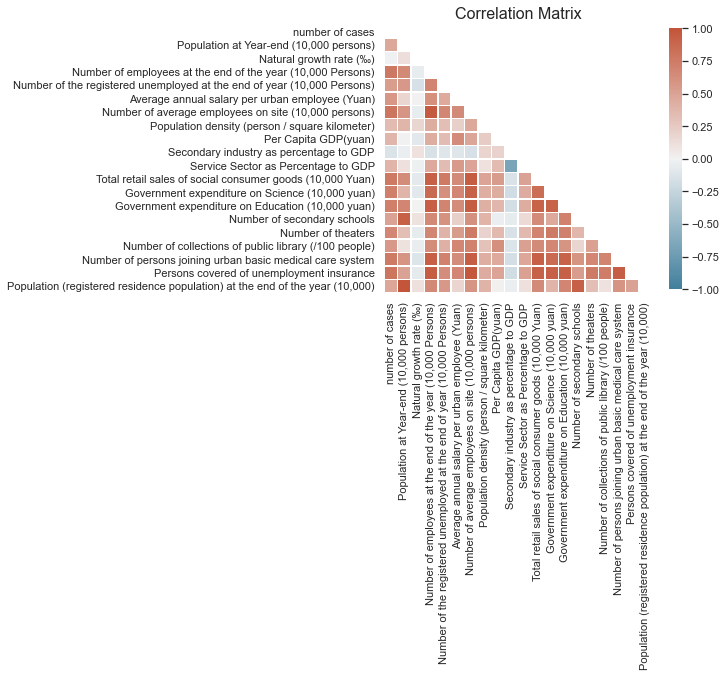

In [43]:
#correlation matrix plot
corr = corr_mat
sns.set_theme(style="white")
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap,
            center=0, vmax=1, vmin=-1,
            square=True, linewidths=.5,
            cbar_kws={"shrink": 0.8})

plt.title("Correlation Matrix", fontsize=16);

In [45]:
#Sort pairs with high correlation
corr_pairs = corr_mat.unstack()
sorted_pairs = corr_pairs.sort_values(kind="quicksort")
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.8]
strong_pairs[:-10]

Total retail sales of social consumer goods (10,000 Yuan)                     Government expenditure on Science (10,000 yuan)                                 0.843440
Government expenditure on Science (10,000 yuan)                               Total retail sales of social consumer goods (10,000 Yuan)                       0.843440
Number of employees at the end of the year (10,000 Persons)                   Government expenditure on Science (10,000 yuan)                                 0.852954
Government expenditure on Science (10,000 yuan)                               Number of employees at the end of the year (10,000 Persons)                     0.852954
Number of persons joining urban basic medical care system                     Government expenditure on Science (10,000 yuan)                                 0.863044
Government expenditure on Science (10,000 yuan)                               Number of persons joining urban basic medical care system                       0.86304

In [46]:
#Drop variables based on high correlation and socioeconomic interpretation
data_reg = data_reg.drop(["Population (registered residence population) at the end of the year (10,000)"], axis = 1)
data_reg = data_reg.drop(["Government expenditure on Education (10,000 yuan)"], axis = 1)
data_reg = data_reg.drop(["Number of persons joining urban basic medical care system"], axis = 1)
data_reg = data_reg.drop(["Number of the registered unemployed at the end of year (10,000 Persons)"], axis = 1)
data_reg = data_reg.drop(["Number of secondary schools"], axis = 1)
data_reg = data_reg.drop(["Number of average employees on site (10,000 persons)"], axis = 1)
data_reg = data_reg.drop(["Persons covered of unemployment insurance","Government expenditure on Science (10,000 yuan)"], axis = 1)
data_reg = data_reg.drop(["Total retail sales of social consumer goods (10,000 Yuan)"], axis = 1)

In [47]:
#Create a new varibale: percentage of employees
data_reg['Percentage_employee'] = data_reg['Number of employees at the end of the year (10,000 Persons)']/data_reg['Population at Year-end (10,000 persons)']
data_reg = data_reg.drop(['Number of employees at the end of the year (10,000 Persons)'],axis = 1)
data_reg.head()
#Move the Percentage_employee forward for the convenience of data anlysis
cols = data_reg.columns.tolist()
cols.insert(10, cols.pop(cols.index('Percentage_employee')))
data_reg = data_reg.reindex(columns= cols)
data_reg.head(10)

,number of cases,"Population at Year-end (10,000 persons)",Natural growth rate (‰),Average annual salary per urban employee (Yuan),Population density (person / square kilometer),Per Capita GDP(yuan),Secondary industry as percentage to GDP,Service Sector as Percentage to GDP,Number of theaters,Number of collections of public library (/100 people),Percentage_employee,Province,City
0,1,81.662000,-2.048000,48290.960000,137.615000,27462.000000,38.465000,47.110000,3.000000,27.700000,0.123550,Heilongjiang,Qitaihe
1,1,286.424000,13.562000,65480.386000,123.670000,74308.750000,51.567500,34.367500,20.000000,169.860000,0.085199,Fujian,Sanming
2,1,718.879600,7.924267,49751.920933,760.757000,43912.788400,48.812667,38.580833,10.266667,25.260333,0.094194,Henan,Sanmenxia
3,1,192.944000,9.894000,73561.942000,230.550000,172369.600000,63.905000,32.637500,20.000000,113.150000,0.219971,Shandong,Dongying
4,1,343.269778,5.015778,56835.102222,261.541667,40623.466667,46.951389,46.380833,13.888889,49.134444,0.125375,Shanxi,Linfen
5,1,262.801714,3.688571,61967.695714,53.709286,90488.035714,44.191786,44.607500,14.142857,72.278571,0.121714,Inner Mongolia,Ulanqab
6,1,118.238000,-5.254000,36261.094000,37.040000,21657.600000,20.872500,37.960000,8.000000,70.405000,0.145217,Heilongjiang,Yichun
7,1,108.044500,11.723111,65996.602667,435.451667,50681.888889,17.356111,62.405556,6.000000,57.500000,0.296506,Hainan,Danzhou
8,1,338.540000,13.012000,67427.276000,333.540000,45073.200000,51.095000,39.890000,7.000000,13.845000,0.070756,Guizhou,Liupanshui
9,1,418.686000,0.800000,47901.146000,785.405000,34235.400000,55.445000,28.802500,9.000000,13.320000,0.069834,Sichuan,Neijiang


In [48]:
#Produce the csv.output
data_reg.to_csv('data_reg.csv')